<a href="https://colab.research.google.com/github/VaibhavChavan15/Unmasking-Malicious-URLs-A-Comparative-Study-of-Machine-Learning-Techniques-for-Fraud-Detection/blob/main/Group02_A1_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLT Assignment 1: Unmasking Malicious URLs: A Comparative Study of Machine Learning Techniques for Fraud Detection**

**Student Details :**

Group Id : 02

Group Name : Random Errors 🤙

**Student Roll No & Name :**

A002_Amey_Acharya

A008_Vaibhav_Chavan

A050_Aniket_Pawar

# **Dataset Information**
The dataset used for the current case study has 185180 samples and 11 inputs.,

segregated_data.csv can be downloaded [here](https://drive.google.com/file/d/1DW3uEoAa0-FHkxRGpXLxSL1K_WTw0WN9/view?usp=sharing).

# **Attribute Information**
Here is the attribute information based on the provided table:

Here's the updated attribute information based on the given column names:

### Attribute Information:
1. **compromissionType**:  
   - Description: The type of compromise or fraud (e.g., defacement, phishing).  
   - Data Type: Categorical  

2. **isHiddenFraudulent**:  
   - Description: Indicator of whether the URL is fraudulent (TRUE for fraudulent, FALSE for benign).  
   - Data Type: Boolean  

3. **contentLength**:  
   - Description: Length of the HTTP content in bytes.  
   - Data Type: Numerical  

4. **serverType**:  
   - Description: Type of server hosting the URL (e.g., Apache/2.2).  
   - Data Type: Categorical  

5. **poweredBy**:  
   - Description: Technology or framework powering the server (e.g., PHP, ASP.NET).  
   - Data Type: Categorical  

6. **contentType**:  
   - Description: MIME type of the content served by the URL (e.g., text/html).  
   - Data Type: Categorical  

7. **lastModified**:  
   - Description: Last modified date and time of the HTTP content.  
   - Data Type: Datetime (or Categorical if preprocessed)  

8. **url_length**:  
   - Description: Length of the URL string.  
   - Data Type: Numerical  

9. **num_dots**:  
   - Description: Number of dots (.) in the URL.  
   - Data Type: Numerical  

10. **num_special**:  
    - Description: Number of special characters (non-alphanumeric) in the URL.  
    - Data Type: Numerical  

11. **has_https**:  
    - Description: Indicator of whether the URL uses HTTPS (1 for HTTPS, 0 otherwise).  
    - Data Type: Boolean  



# **Learnings**

1. **Detection of Malicious URLs Using Machine Learning**:  
   Learned how machine learning models can be leveraged to effectively identify malicious URLs, reducing security risks for users and organizations.

2. **Feature Engineering and Selection**:  
   Understood the importance of engineering features such as `url_length`, `num_dots`, and `num_special` to capture patterns indicative of malicious behavior. Feature selection helped improve model performance and interpretability.

3. **Evaluation Metrics for Imbalanced Data**:  
   Gained insights into selecting appropriate evaluation metrics like ROC AUC and Log Loss to evaluate model performance effectively on imbalanced datasets.

4. **Comparative Analysis of Models**:  
   Conducted a comparative analysis of multiple classification models (e.g., KNN, Decision Tree, Random Forest) to identify the best-performing model for malicious URL detection.

5. **Model Interpretation and Decision-Making**:  
   Learned how to interpret model outputs, such as feature importance scores and classification probabilities, to derive actionable insights and make informed decisions.

6. **Exploratory Data Analysis (EDA)**:  
   Conducted EDA to uncover key patterns and trends in malicious URLs, including server types, the use of HTTPS, and common content types associated with fraudulent activity.

7. **Handling Missing Values**:  
   Treated missing values systematically in attributes such as `serverType` and `contentType`, ensuring data integrity and consistency throughout the analysis.

8. **Security Insights for Prevention Strategies**:  
   Identified key attributes (e.g., `has_https`, `poweredBy`, `contentLength`) that influence the likelihood of a URL being malicious, enabling targeted security measures.

9. **Business Applications of Machine Learning**:  
   Realized how the insights from this analysis can guide organizations in implementing robust cybersecurity measures, improving customer trust, and reducing potential financial losses.

10. **ROI of Machine Learning in Cybersecurity**:  
    Understood the cost-effectiveness of machine learning in detecting malicious URLs, highlighting its potential for scalable and efficient security solutions.



# **Case Study: Malicious URL Detection for Cybersecurity**

#### The Current Scenario
The dataset provides detailed information about web URLs, including server type, content type, the presence of HTTPS, URL length, and other attributes. The primary goal of this study is to classify URLs as malicious or non-malicious, with the intention of reducing cybersecurity risks and improving operational efficiency for organizations.

#### The Problem
In the absence of a machine learning-driven detection system, organizations often rely on manual or heuristic-based methods for identifying malicious URLs. This approach has two significant drawbacks:  
1. **High Operational Costs**: Investigating every suspicious URL consumes considerable time and resources.  
2. **Security Risks**: Legitimately malicious URLs might be missed, leading to potential security breaches, data loss, and reputational damage.  

#### Cost Analysis for the Campaign
To quantify the costs associated with incorrect classifications in malicious URL detection, we define the following costs:  
1. **False Positive (Type I Error)**:  
   A URL is classified as malicious, but it is actually benign.  
   **Cost per URL:** 100 EUR (resources spent on unnecessary investigations).  
2. **False Negative (Type II Error)**:  
   A URL is classified as benign, but it is actually malicious.  
   **Cost per URL:** 1000 EUR (costs due to a security breach or attack).  

#### Objectives of the Project
1. Develop a machine learning model to classify URLs as malicious or non-malicious with high precision and recall.
2. Minimize the overall costs associated with false positives and false negatives.
3. Enhance cybersecurity by proactively identifying and blocking malicious URLs.

#### Methodology
1. **Data Preprocessing**:  
   - Handle missing values systematically.  
   - Engineer features such as `url_length`, `num_dots`, and `has_https` to capture malicious patterns.  

2. **Exploratory Data Analysis (EDA)**:  
   - Identify trends and correlations in the attributes of malicious and benign URLs.  
   - Understand the distribution of attributes such as `serverType` and `contentLength`.

3. **Model Building**:  
   - Train and evaluate multiple classification models (e.g., KNN, Decision Tree, Random Forest).  
   - Use cost-sensitive learning to prioritize minimizing Type II errors.

4. **Evaluation Metrics**:  
   - Use ROC AUC, precision, recall, and log loss to assess model performance.  
   - Implement a cost metric to calculate the financial impact of misclassifications.  



**Import Required Libraries**




In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             roc_auc_score, log_loss, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")

**Google Drive Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading and Preprocessing**

In [ ]:
# Load dataset
data_filepath = "/content/drive/MyDrive/segregated_data.csv"
df = pd.read_csv(data_filepath)
print("Null values in the data:")
print(df.isnull().sum())

# Handling Missing Values

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Handle numerical columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Handle categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Special handling for specific features
for col in ['lastModified', 'serverType', 'poweredBy', 'contentType']:
    df[col].fillna("Unknown", inplace=True)

print("Missing values handled:")
print(df.isnull().sum())

# Feature extraction
df['url_length'] = df['url'].apply(len)
df['num_dots'] = df['url'].str.count(r'\.')
df['num_special'] = df['url'].str.count(r'[^\w\s]')
df['has_https'] = df['url'].str.startswith('https').astype(int)
df.drop(columns='url', inplace=True)

# Convert categorical to numeric
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.factorize(df[col])[0]
df = df.astype(np.float64)

Null values in the data:
url                       0
compromissionType         0
isHiddenFraudulent        0
contentLength             0
serverType             2082
poweredBy             83841
contentType            2306
lastModified          77592
dtype: int64


<ipython-input-4-04a08a752373>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


Missing values handled:
url                   0
compromissionType     0
isHiddenFraudulent    0
contentLength         0
serverType            0
poweredBy             0
contentType           0
lastModified          0
dtype: int64


**Exploratory Data Analysis (EDA)**

Exploratory Data Analysis
Total samples: 185180
Fraudulent ratio: 4.70%


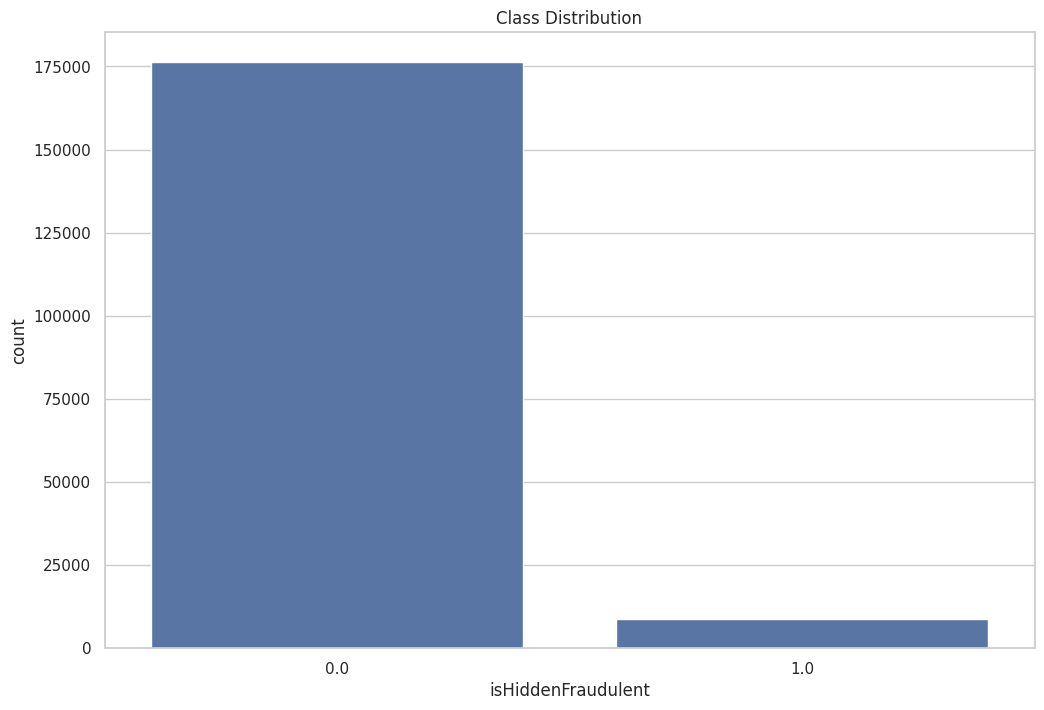

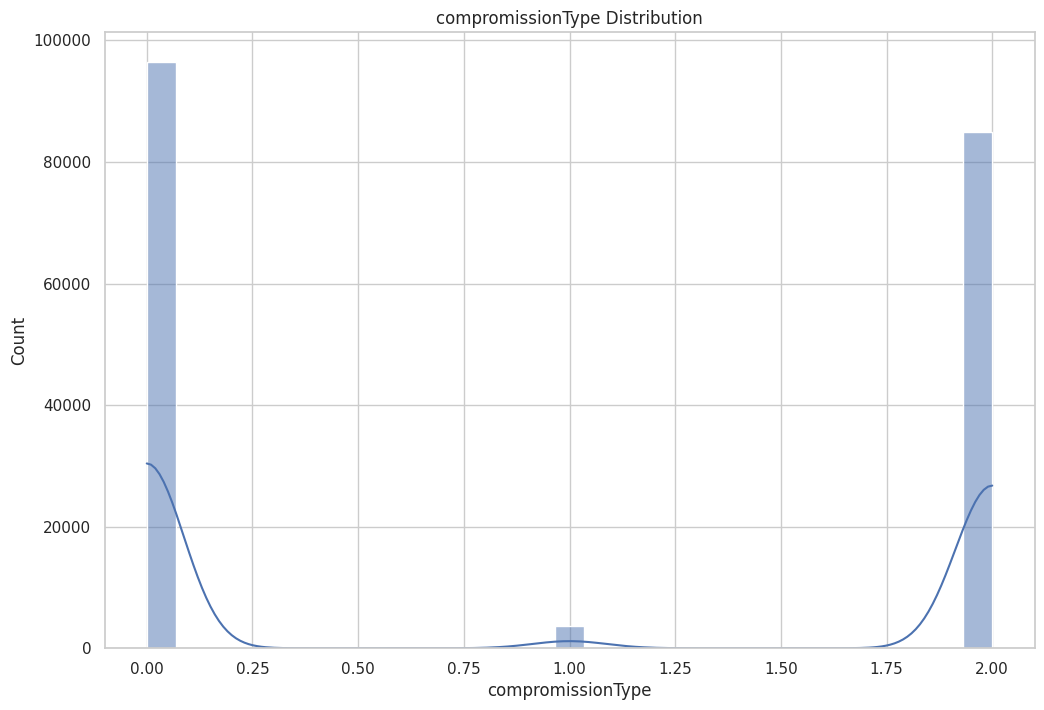

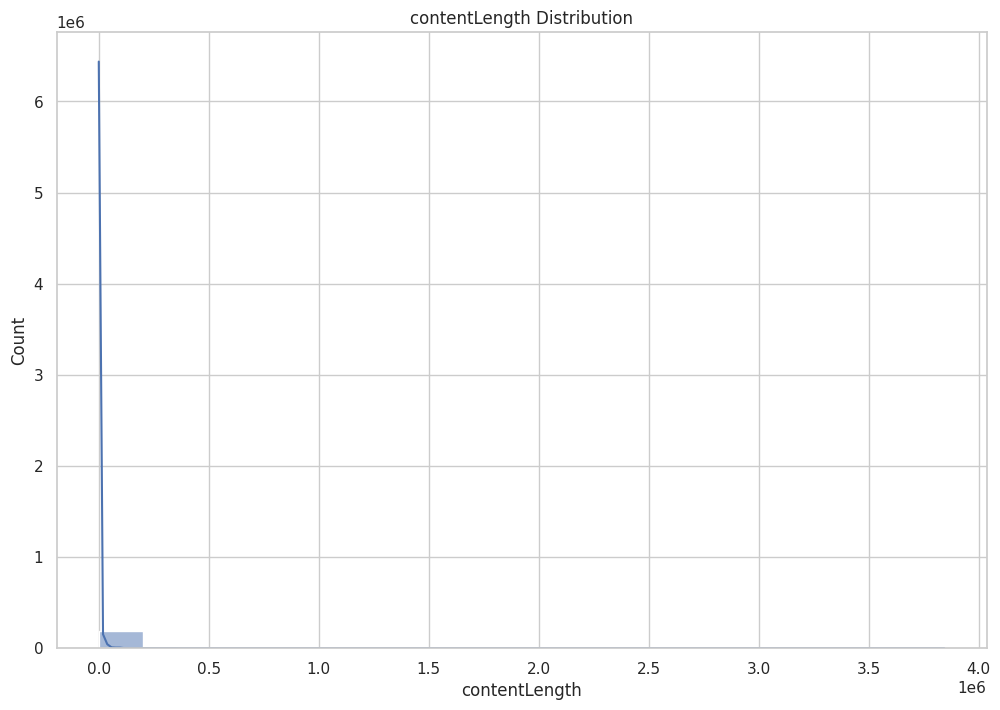

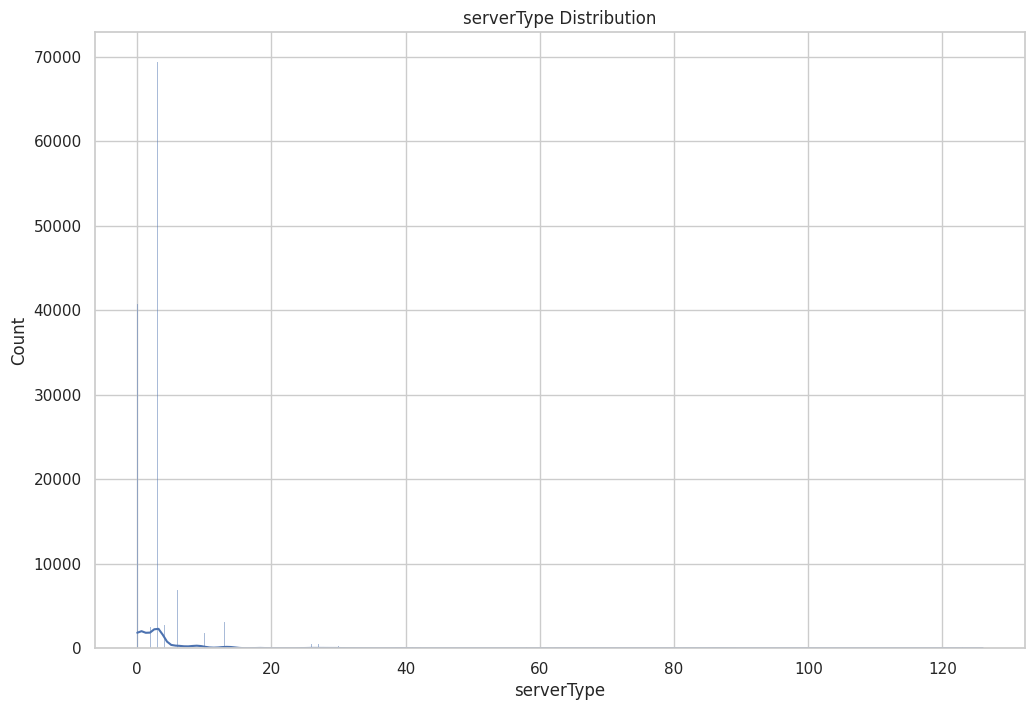

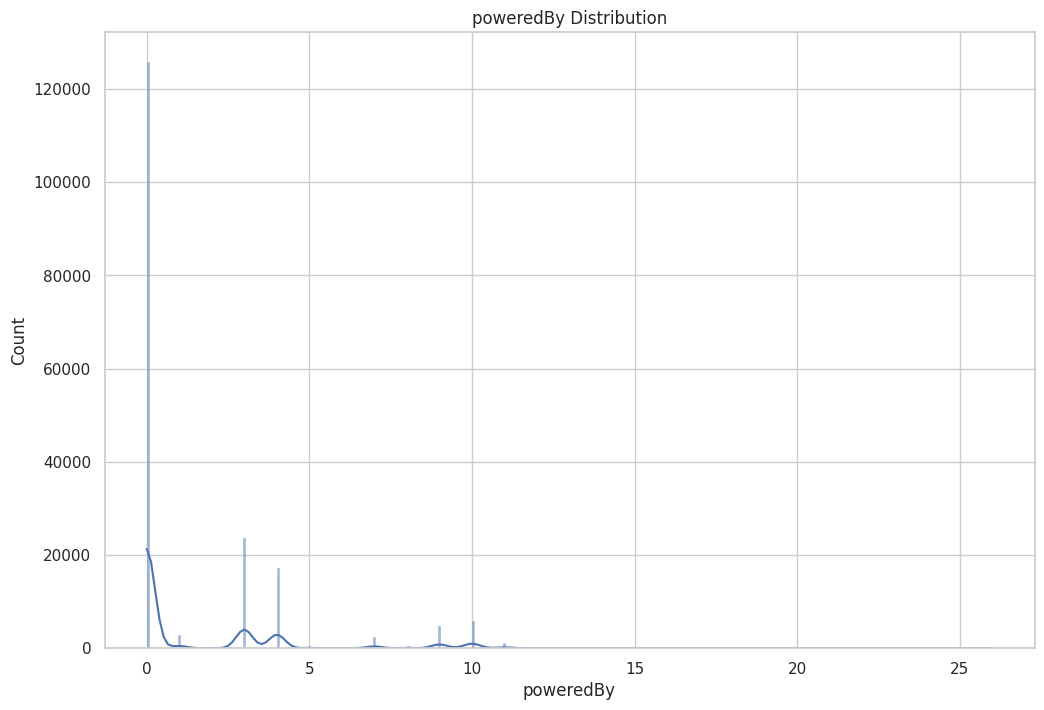

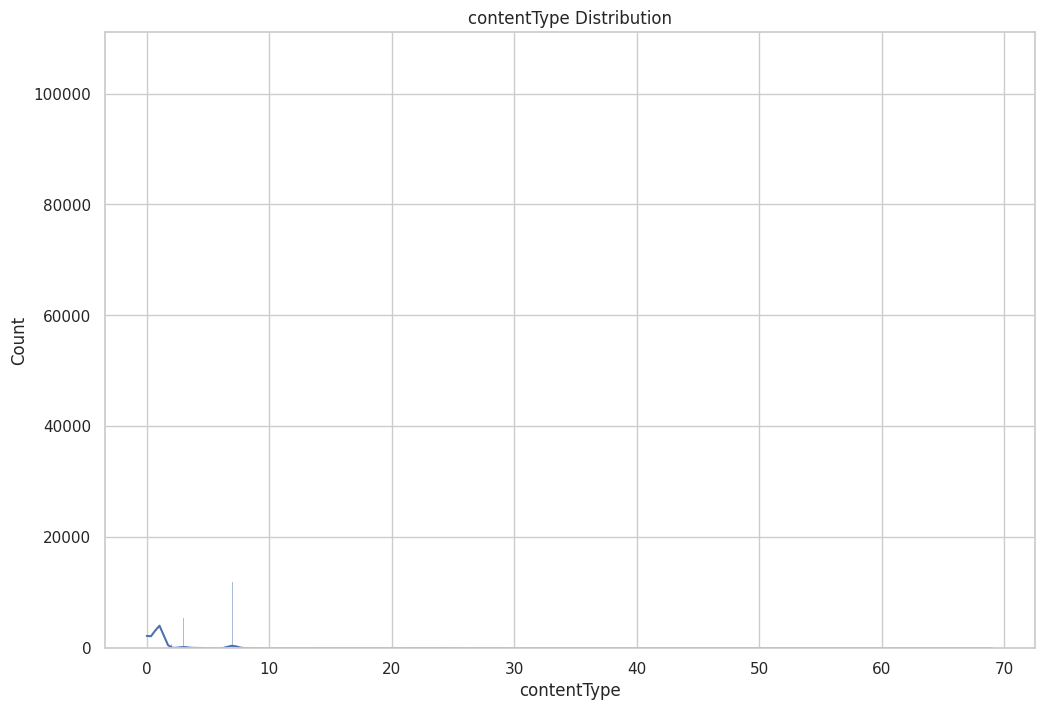

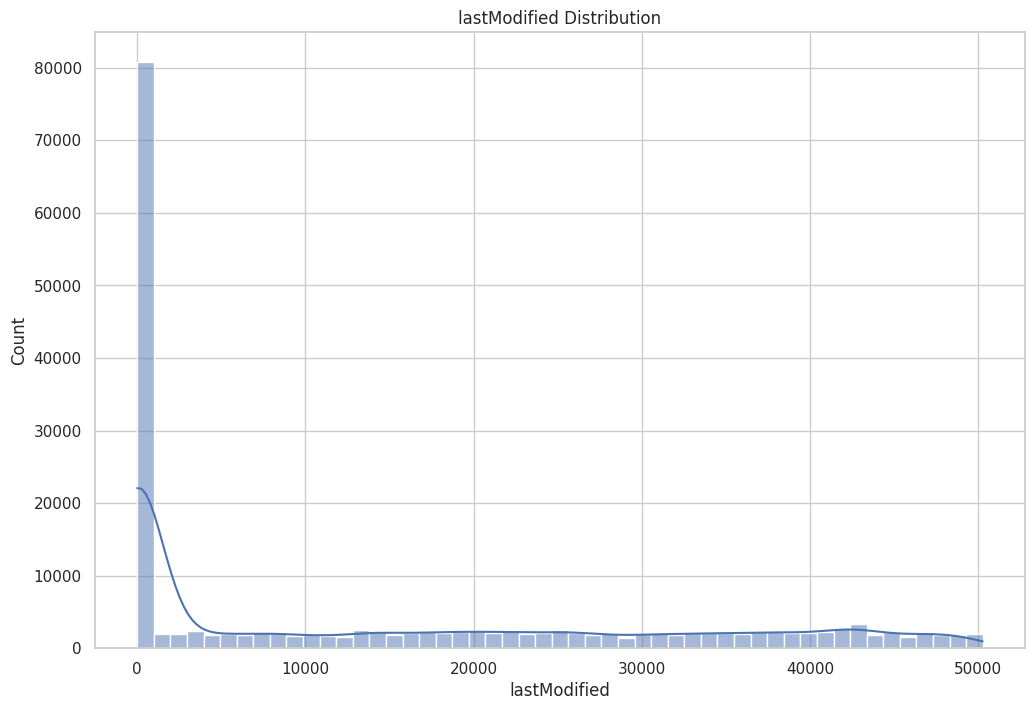

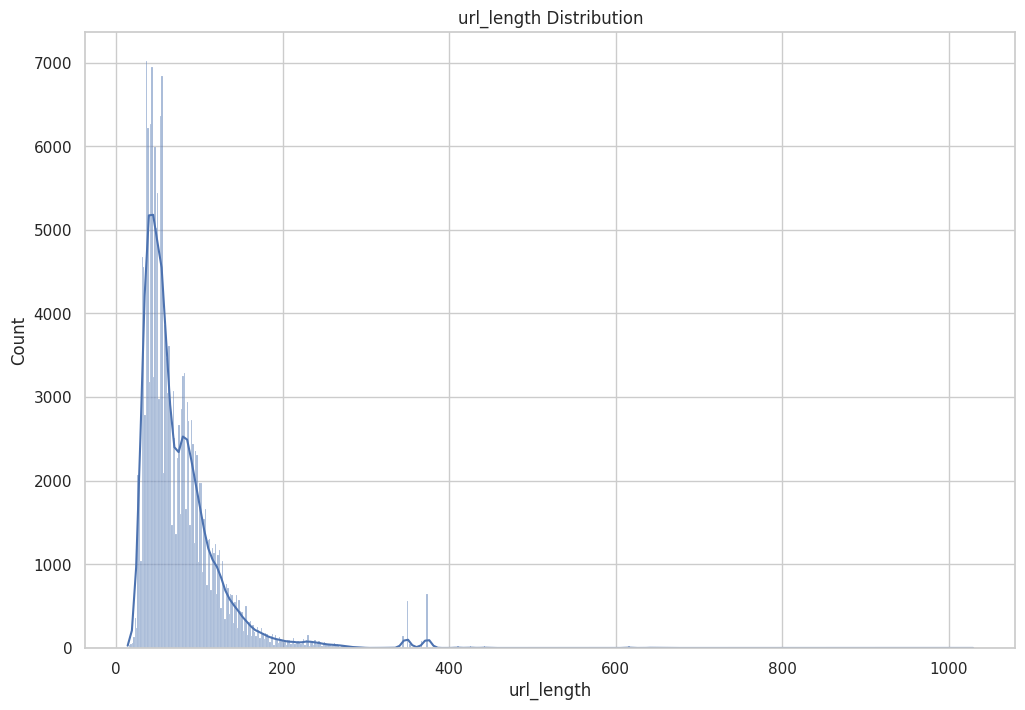

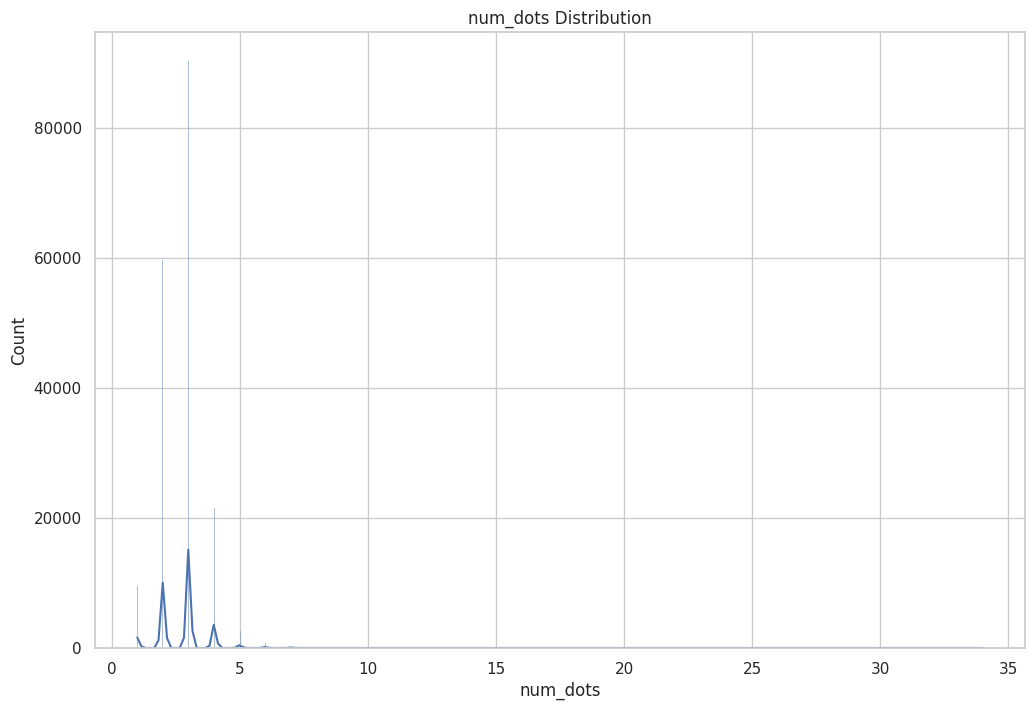

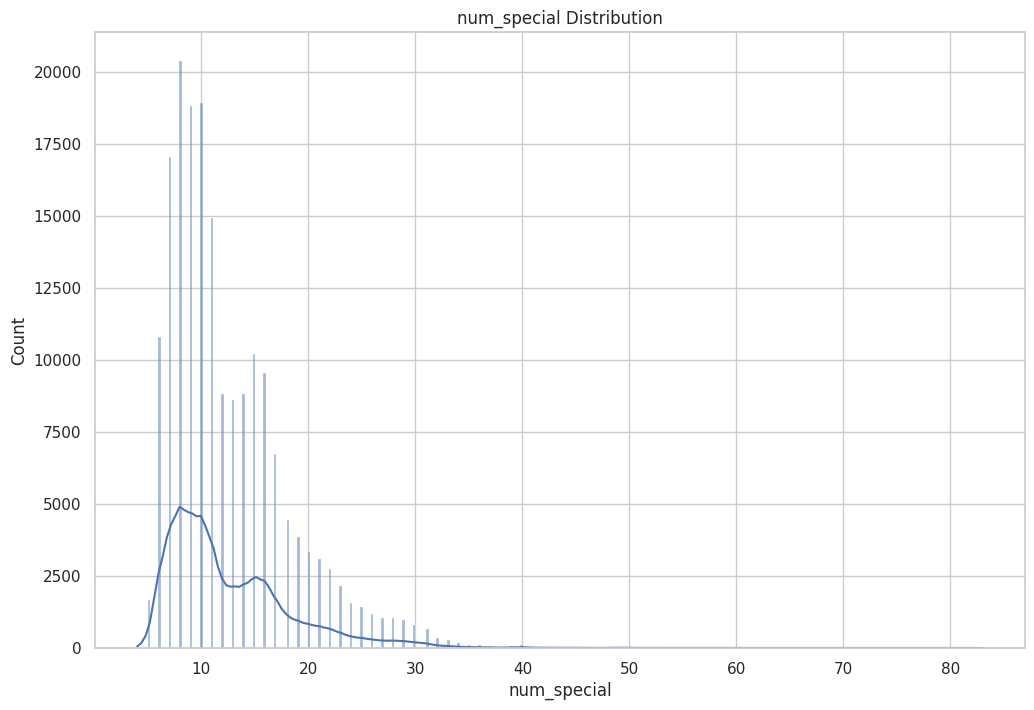

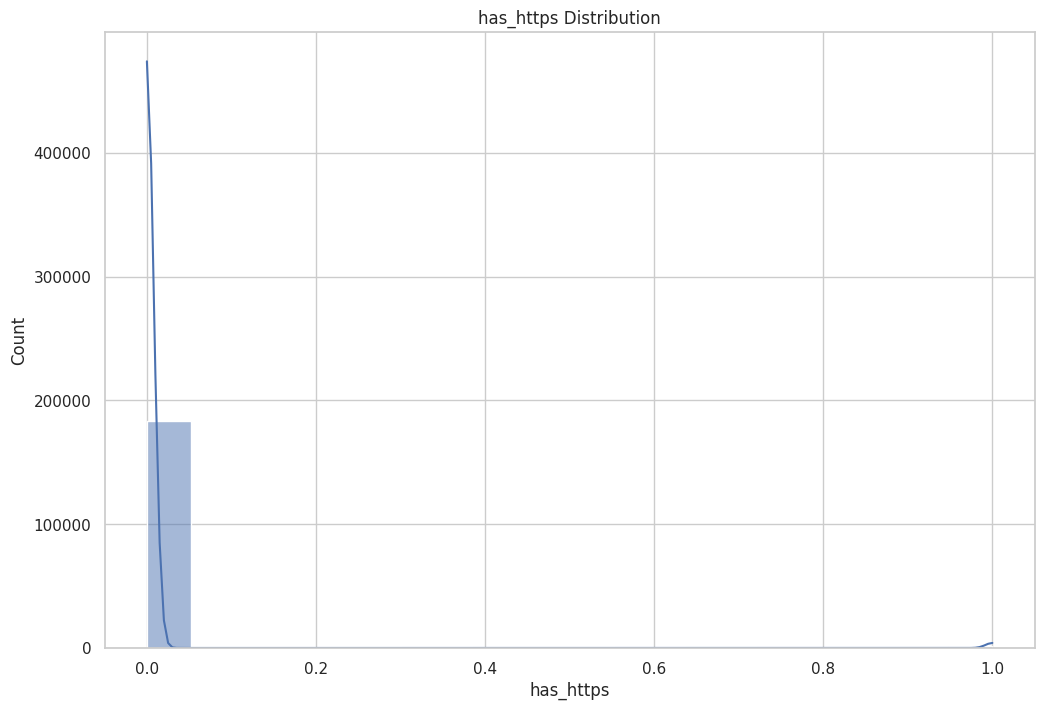

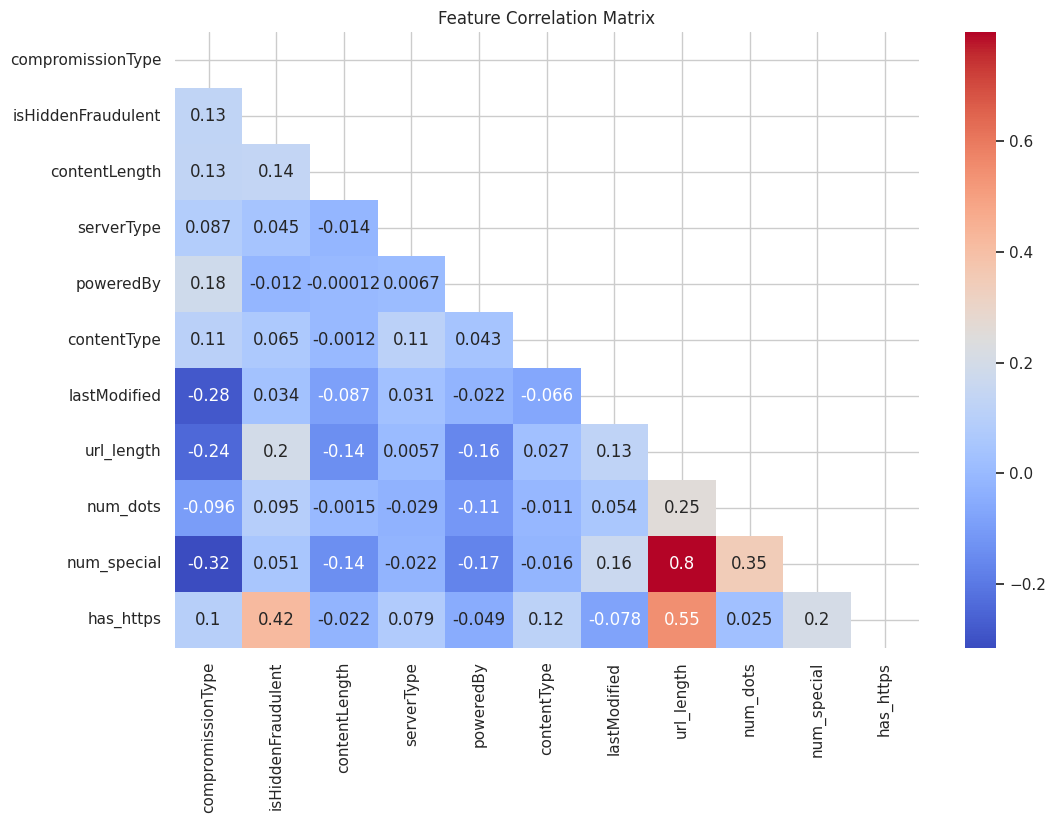

In [ ]:
#Summary Statistics
print("="*40)
print("Exploratory Data Analysis")
print("="*40)
print(f"Total samples: {len(df)}")
print(f"Fraudulent ratio: {df['isHiddenFraudulent'].mean():.2%}")

#Visualizations
#Class Distribution
sns.countplot(x=df['isHiddenFraudulent'])
plt.title("Class Distribution")
plt.show()

#Feature Distributions
for idx, col in enumerate(df.columns.drop('isHiddenFraudulent'), start=2):
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Feature Correlation Matrix")
plt.show()

# **Correlation Matrix Analysis :**

**Strong Positive Correlations:**

num_special and url_length (0.8):

Indicates that URLs with more special characters tend to have longer lengths.
num_dots and url_length (0.55):

Suggests that longer URLs often contain more dots.

**Moderate Positive Correlations:**


isHiddenFraudulent and has_https (0.42):

Suggests that fraudulent URLs might often have HTTPS.

num_special and num_dots (0.35):

Indicates that special characters and dots tend to co-occur in URLs.

**Strong Negative Correlations:**


lastModified and num_special (-0.32):

Suggests that URLs with frequent special characters tend to have fewer
modifications.

lastModified and compromissionType (-0.28):

Indicates that URLs associated with certain compromise types might be modified less frequently.

**Weak Correlations:**

Most features show weak correlations (close to 0), indicating little to no linear relationship.For instance:

contentLength and poweredBy (-0.00012): No significant relationship.
serverType and isHiddenFraudulent (0.045): Minimal relationship.

**Data Preparation for Modeling**

In [ ]:
#Train-Test Split

X = df.drop('isHiddenFraudulent', axis=1)
y = df['isHiddenFraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training and Evaluation**


Training KNN...
KNN -> Train Accuracy: 0.990 | Test Accuracy: 0.988 (Good Fit)


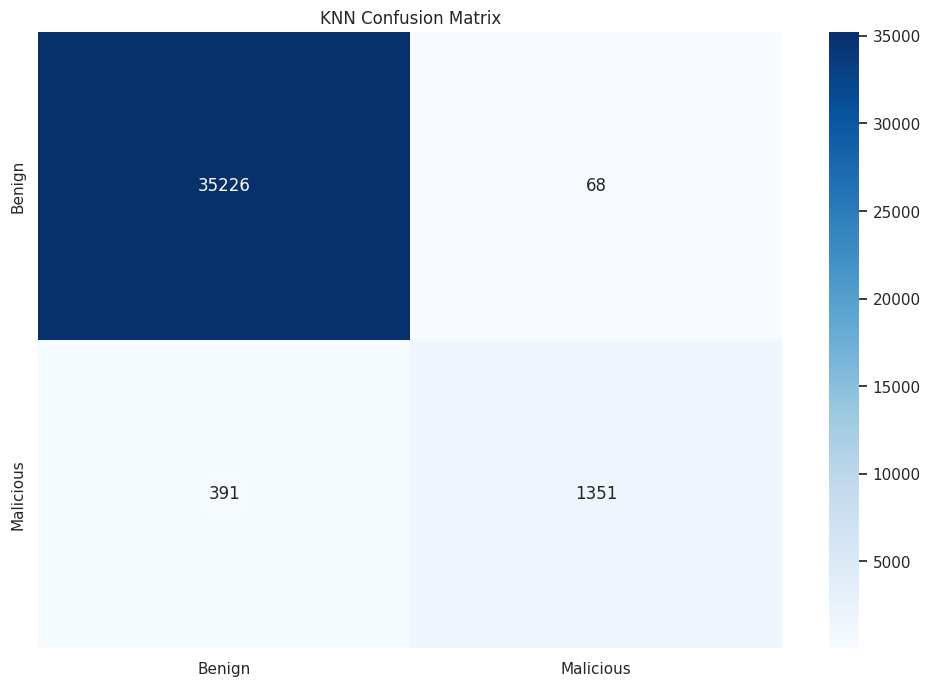


Training Decision Tree...
Decision Tree -> Train Accuracy: 0.841 | Test Accuracy: 0.843 (Good Fit)


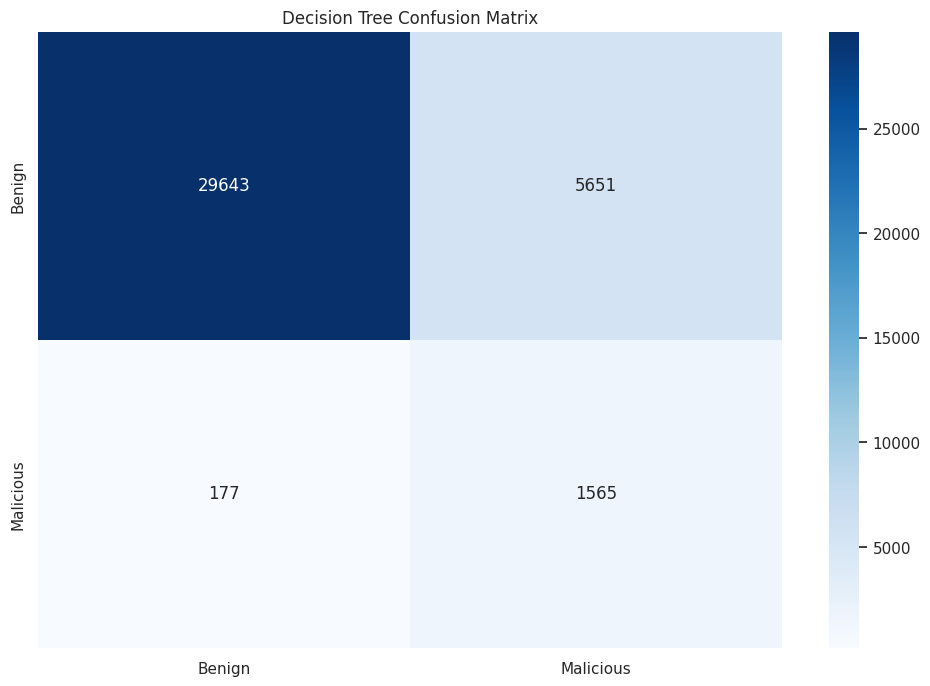


Training Random Forest...
Random Forest -> Train Accuracy: 0.997 | Test Accuracy: 0.990 (Good Fit)


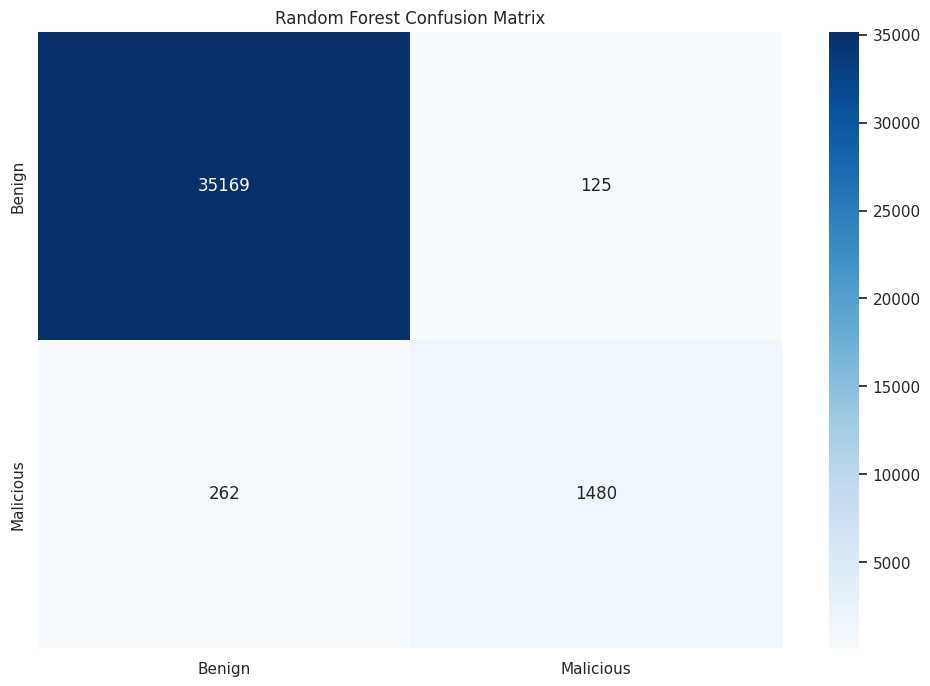

In [ ]:
#Model Training

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', max_depth=5),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100)
}
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    logloss = log_loss(y_test, y_test_proba)

    fit_status = "Good Fit" if abs(train_acc - test_acc) <= 0.05 else "Overfitting" if train_acc > test_acc else "Underfitting"

    print(f"{name} -> Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f} ({fit_status})")

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'Log Loss': logloss,
        'Fit Status': fit_status
    })
#Confusion Matrix

    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
    plt.title(f"{name} Confusion Matrix")
    plt.show()

**Model Comparison and Results**


Model Comparison Results
        Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  Precision  Recall  ROC AUC  Log Loss Fit Status
          KNN           0.990          0.988           0.890          0.855      0.952   0.776    0.950     0.183   Good Fit
Decision Tree           0.841          0.843           0.351          0.349      0.217   0.898    0.948     0.268   Good Fit
Random Forest           0.997          0.990           0.972          0.884      0.922   0.850    0.987     0.059   Good Fit


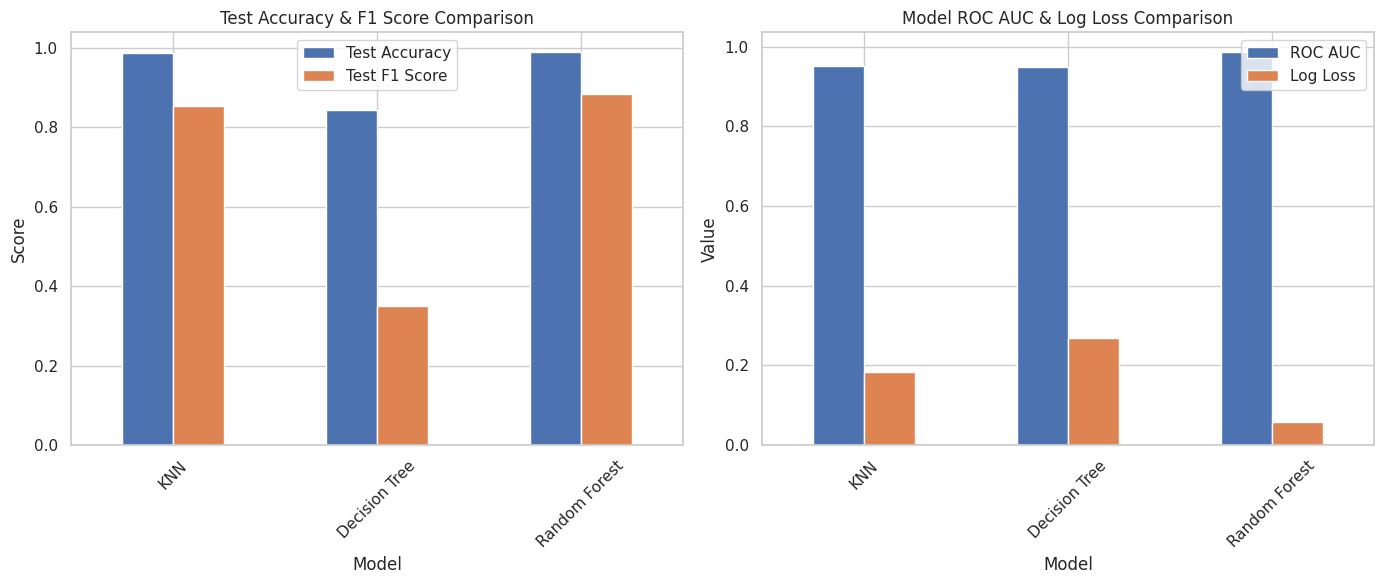

In [ ]:
#Consolidated Results

results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("Model Comparison Results")
print("="*40)
print(results_df.round(3).to_string(index=False))
#Visual Comparison

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
results_df.set_index('Model')[['Test Accuracy', 'Test F1 Score']].plot(kind='bar', ax=plt.gca())
plt.title("Test Accuracy & F1 Score Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
results_df.set_index('Model')[['ROC AUC', 'Log Loss']].plot(kind='bar', ax=plt.gca())
plt.title("Model ROC AUC & Log Loss Comparison")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Key Insights from Model Performance**
### **K-Nearest Neighbors (KNN):**

**Strengths:**
Achieved high Test Accuracy (98.8%) and robust ROC AUC (95%), indicating strong generalization capabilities.
Precision of 95.2% makes it suitable for minimizing false positives.

**Weakness:**
Slightly lower Recall (77.6%), which means some fraudulent URLs may not be detected.
Requires significant computational resources for large datasets due to its instance-based learning approach.


### **Decision Tree:**

**Strengths:**
Moderate Test Accuracy (84.3%) and high Recall (89.8%), making it suitable for detecting most fraudulent URLs.
Simplicity and interpretability, as Decision Trees provide clear insights into decision boundaries.

**Weaknesses:**
Poor Precision (21.7%) indicates a high false-positive rate.
Overfitting was avoided, but overall performance is limited compared to other models.


### **Random Forest:**

**Strengths:**
Best overall performance with the highest Test Accuracy (99%), ROC AUC (98.7%), and the lowest Log Loss (0.059), indicating a strong predictive capability and confidence in predictions.
Balanced Precision (92.2%) and Recall (85%) provide excellent reliability in identifying fraudulent URLs while minimizing false positives and negatives.
Robust against overfitting due to ensemble averaging.

**Weakness:**
Computationally expensive, especially for larger datasets or real-time detection scenarios.


# **Final Model Recommendation**
**Random Forest** is the best-performing model based on the evaluation metrics. It demonstrates the highest generalization capability, balanced precision-recall tradeoff, and strong interpretability through feature importance analysis.
If computational cost is a constraint, KNN can be considered as an alternative due to its comparable performance, especially in Precision.